In [1100]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

plt.rcParams["figure.figsize"] = (10,10)

# Задание 1

In [1101]:
global count_grad_use
global count_func_use

In [1102]:
def num_diff(f, point, diff_coordinate, delta=1e-4):
    plus_delta = point.copy()
    plus_delta[diff_coordinate] += delta
    minus_delta = point.copy()
    minus_delta[diff_coordinate] -= delta
    global count_func_use
    count_func_use += 2
    return (f(np.array(plus_delta)) - f(np.array(minus_delta))) / (2 * delta)


def grad(f, point):
    global count_grad_use
    count_grad_use += 1
    return [num_diff(f, point, i) for i in range(len(point))]

In [1103]:
def GD(f, lr, start, epoch=20):
    global count_grad_use
    count_grad_use = 0
    global count_func_use
    count_func_use = 0
    point = start
    points = np.zeros((epoch, len(start)))
    points[0] = point
    for i in range(1, epoch):
        point = point - lr * np.array(grad(f, point))
        points[i] = point
        if np.linalg.norm(points[i] - points[i - 1], len(points[0])) < 1e-4:
            break
    return points

In [1104]:
def draw(f, points, t):
    X = np.meshgrid(t, t)
    plt.plot(points[:, 0], points[:, 1], 'o-')
    plt.contour(X[0], X[1], f(X), levels=sorted([f(np.array(p)) for p in points] ))
    plt.show()

# Задание 2

In [1105]:
def split(f, xk):
    alpha = 0.5
    current_step_f = f(xk)
    next_step_f = f(xk - alpha * np.array(grad(f, xk)))
    if next_step_f < current_step_f:
        alpha *= 2.5
        temp = f(xk - alpha * np.array(grad(f, xk)))
        while next_step_f > temp:
            alpha *= 1.33
            temp = f(xk - alpha * np.array(grad(f, xk)))

    return [0, alpha]

def dichotomy(f, l, r, xk):
    h = 1e-5
    while r - l > 0.1:
        m = (l + r) / 2
        left = f(xk - (m - h) * np.array(grad(f, xk)))
        right = f(xk - (m + h) * np.array(grad(f, xk)))
        if left < right:
            r = m + h
        elif left > right:
            l = m - h
    return xk - l * np.array(grad(f, xk))

def dichotomyGD(f, start):
    last_x = start
    global count_grad_use
    count_grad_use = 0
    global count_func_use
    count_func_use = 0
    sep = split(f, last_x)
    x = dichotomy(f, sep[0], sep[1], last_x)
    while True:
        if np.linalg.norm(x - last_x) < 0.01:
            break
        sep = split(f, x)
        last_x = x
        x = dichotomy(f, sep[0], sep[1], x)
    return x

# Задание 3

Первая квадратичная функция: $f(x, y) = (x - 13)^2 + 4 \cdot (y - 7)^2$ <br>

In [1106]:
def f1(x):
    return (x[0] - 13) ** 2 + 4 * (x[1] - 7) ** 2

point_result_f1 = [13, 7]

Вторая квадратичная функция: $f(x, y) = 0.5 \cdot x^2 + ln(y^2 + 1)$ <br>

In [1107]:
def f2(x):
    return 0.5 * (x[0] ** 2) + np.log((x[1] ** 2) + 1)

point_result_f2 = [0, 0]

# Задание 4

Рассмотрим первую функцию: $f(x, y) = (x - 13)^2 + 4 \cdot (y - 7)^2$ <br>
Градиентный спуск:

In [1108]:
def tabl(start_points, grads_calls, func_calls, points, point_result):
    data = [[start_points[0], grads_calls[0], func_calls[0], points[0], point_result], [start_points[1], grads_calls[1], func_calls[1], points[1], point_result], [start_points[2], grads_calls[2], func_calls[2], points[2], point_result]]
    df = pd.DataFrame(data, columns=["Start point", "Number of grad calls", "Number of f calls", "Result", "Expected"])
    pd.options.display.expand_frame_repr = False
    pd.set_option('colheader_justify', 'center')
    print(df)

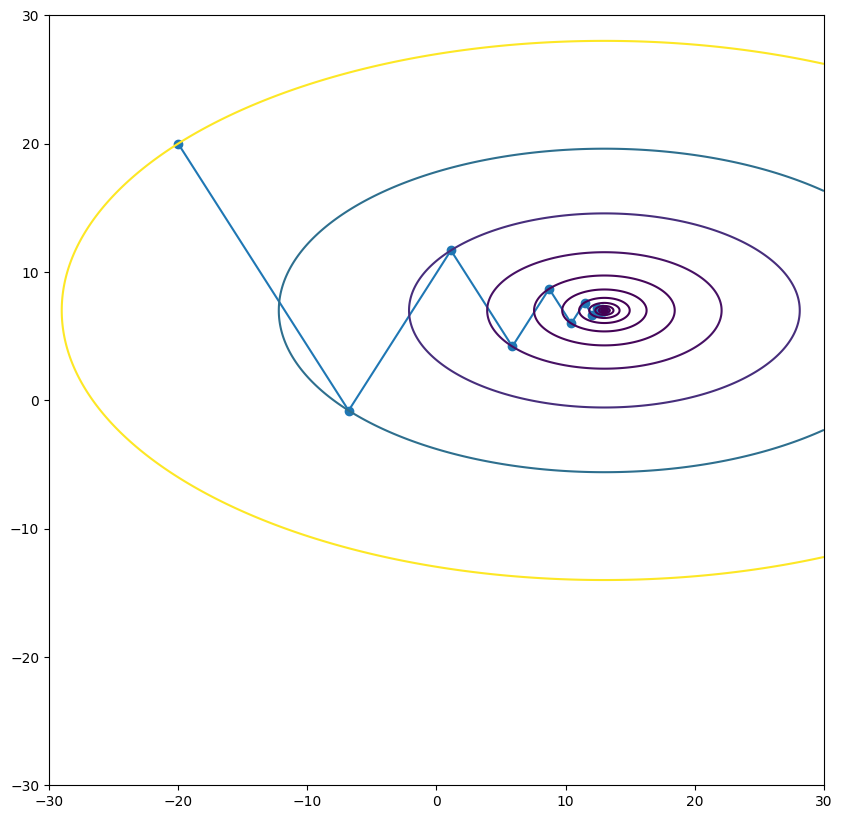

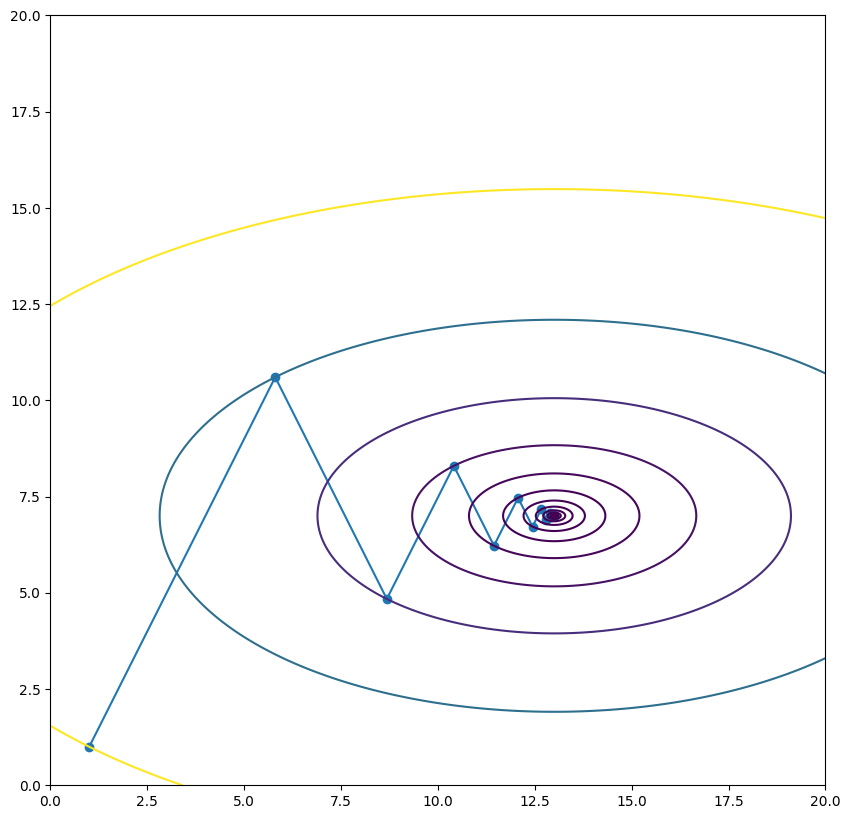

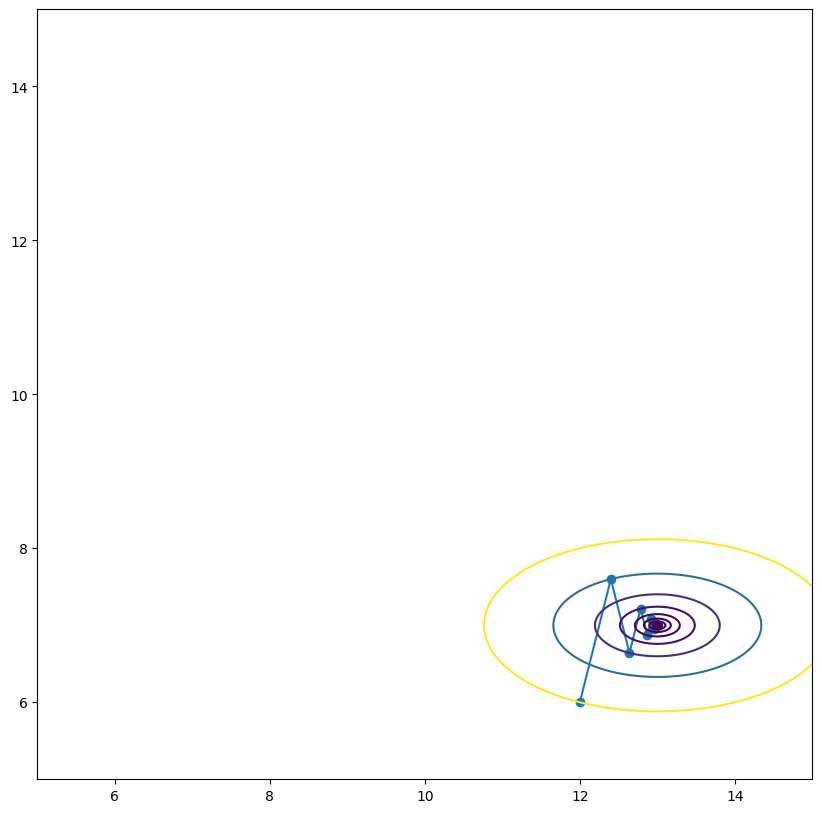

  Start point  Number of grad calls  Number of f calls                  Result                  Expected
0   [-20, 20]           19                  76           [12.99798911285797, 6.999207832338066]  [13, 7]
1      [1, 1]           19                  76          [12.999268768311957, 7.000365615843965]  [13, 7]
2     [12, 6]           19                  76          [12.999939064025996, 7.000060935973994]  [13, 7]


In [1109]:
start_points_f1 = [[-20, 20], [1, 1], [12, 6]]
t = [[-30, 30], [0, 20], [5, 15]]
grads_calls = list()
func_calls = list()
points = list()
for i in range(3):
    point= GD(f1, 0.2, start_points_f1[i], epoch=20)
    draw(f1, point, np.linspace(t[i][0], t[i][1], 1000))
    grads_calls.append(count_grad_use)
    func_calls.append(count_func_use)
    points.append(point[-1])

tabl(start_points_f1, grads_calls, func_calls, points, point_result_f1)

Можно заметить, стартовая точка не влияет на скорость сходимости, это всё потому, что Градиентный спуск довольно хорошо сходится в отдалении от минимума, но при этом плохо сходится в окрестности минимума.

Рассмотрим теперь Дихотомию на той же функции

In [1110]:
grads_calls = list()
func_calls = list()
points = list()
for start in start_points_f1:
    point = dichotomyGD(f1, start)
    grads_calls.append(count_grad_use)
    func_calls.append(count_func_use)
    points.append(point)

tabl(start_points_f1, grads_calls, func_calls, points, point_result_f1)

  Start point  Number of grad calls  Number of f calls                   Result                  Expected
0   [-20, 20]           49                  196           [12.98412954431949, 6.999999665759955]  [13, 7]
1      [1, 1]           49                  196         [12.994228925207707, 7.0000001542646535]  [13, 7]
2     [12, 6]           41                  164          [12.998900795813586, 7.000453718127295]  [13, 7]


Можно заметить, что это метод работает за большее количество вычислений, но с лучшей точностью.

Рассмотрим вторую функцию: $f(x, y) = 0.5 \cdot x^2 + ln(y^2 + 1)$ <br>

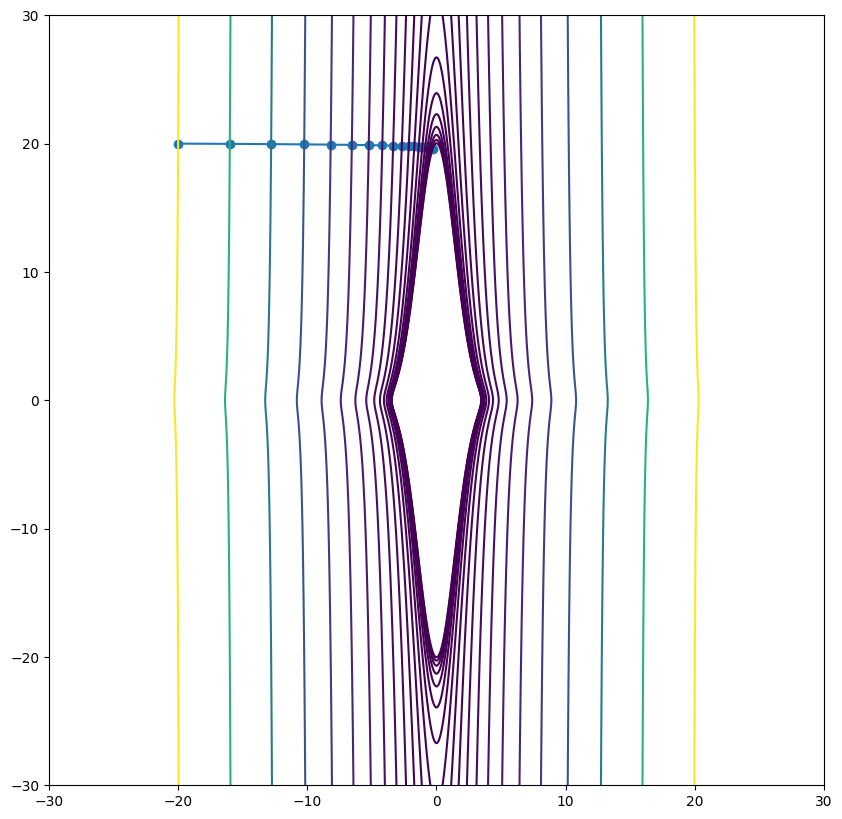

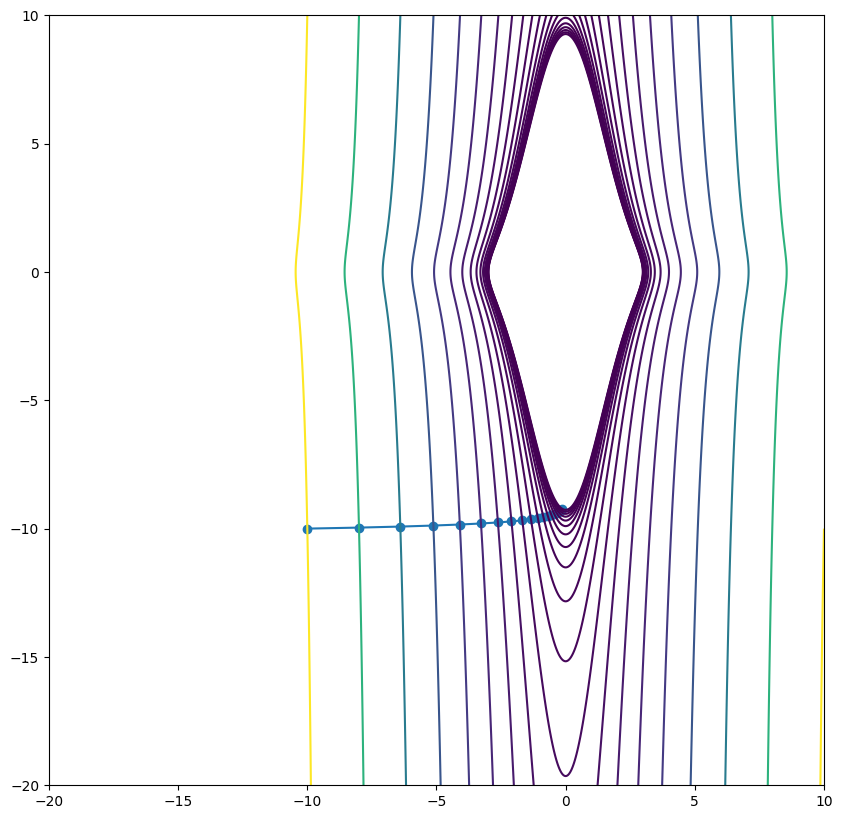

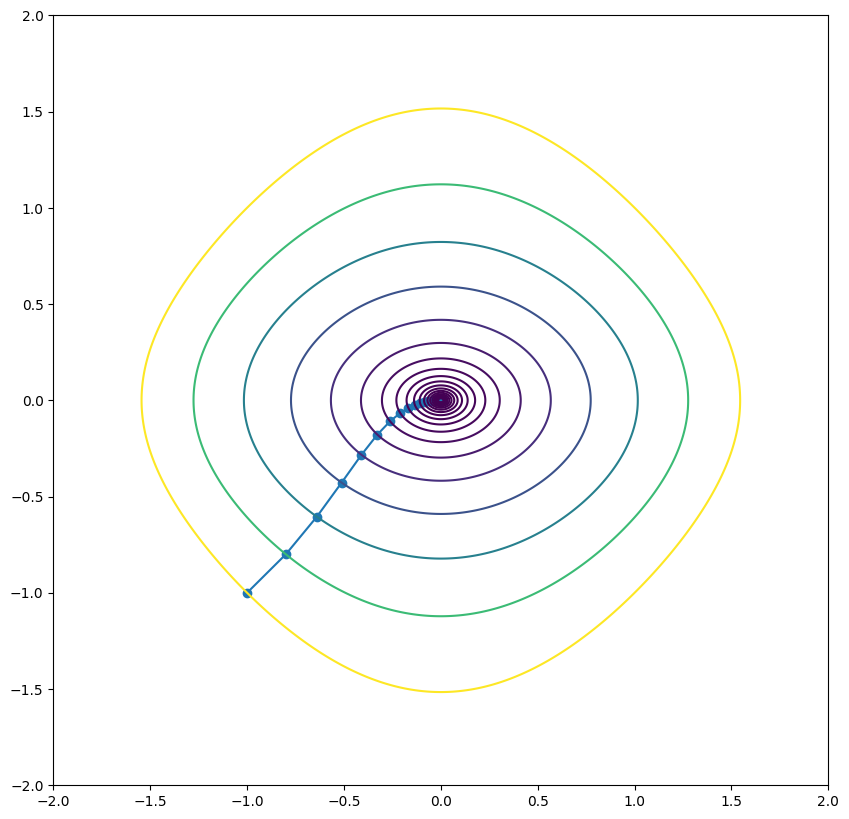

  Start point  Number of grad calls  Number of f calls                      Result                     Expected
0   [-20, 20]           19                  76              [-0.28823037615175906, 19.617499877872184]  [0, 0] 
1  [-10, -10]           19                  76               [-0.1441151880767677, -9.219237382205527]  [0, 0] 
2    [-1, -1]           19                  76          [-0.01441151880759367, -0.0001443363859065939]  [0, 0] 


In [1111]:
start_points_f2 = [[-20, 20], [-10, -10], [-1, -1]]
t = [[-30, 30], [-20, 10], [-2, 2]]
grads_calls = list()
func_calls = list()
points = list()
for i in range(3):
    point= GD(f2, 0.2, start_points_f2[i], epoch=20)
    draw(f2, point, np.linspace(t[i][0], t[i][1], 1000))
    grads_calls.append(count_grad_use)
    func_calls.append(count_func_use)
    points.append(point[-1])

tabl(start_points_f2, grads_calls, func_calls, points, point_result_f2)

По представленной таблице можно сделать вывод, что Градиентный спуск плохо работает на функции 2, ему сложно попасть в область минимума из далёких точек, при этом если запускать алгоритм из точки, вблизи минимума, метод показывает достойную сходимость.

Рассмотрим теперь метод с Дихотомией на второй функции

In [1112]:
grads_calls = list()
func_calls = list()
points = list()
for start in start_points_f1:
    point = dichotomyGD(f2, start)
    grads_calls.append(count_grad_use)
    func_calls.append(count_func_use)
    points.append(point)

tabl(start_points_f2, grads_calls, func_calls, points, point_result_f2)

  Start point  Number of grad calls  Number of f calls                       Result                      Expected
0   [-20, 20]           185                 740         [-0.0004627295226277621, -0.0005798292600492001]  [0, 0] 
1  [-10, -10]            36                 144           [0.0008222526384454813, 0.0008675199651104696]  [0, 0] 
2    [-1, -1]           101                 404          [-0.003017530529810672, -0.0010226207503865785]  [0, 0] 


В отличие от классического градиентного спуска данный метод показал отличную сходимость, однако затратил на это огромное количество вычислений функции и градиента.

Рассмотрим пользу масштабирования на примере плохо обусловленных функций

In [1113]:
def big_norm_f(x):
    return 1000 * (x[0] ** 2 + x[1] ** 2)

In [1114]:
def norm_f(x):
    return x[0] ** 2 + x[1] ** 2

In [1115]:
def small_norm_f(x):
    return 1 / 1000 * (x[0] ** 2 + x[1] ** 2)

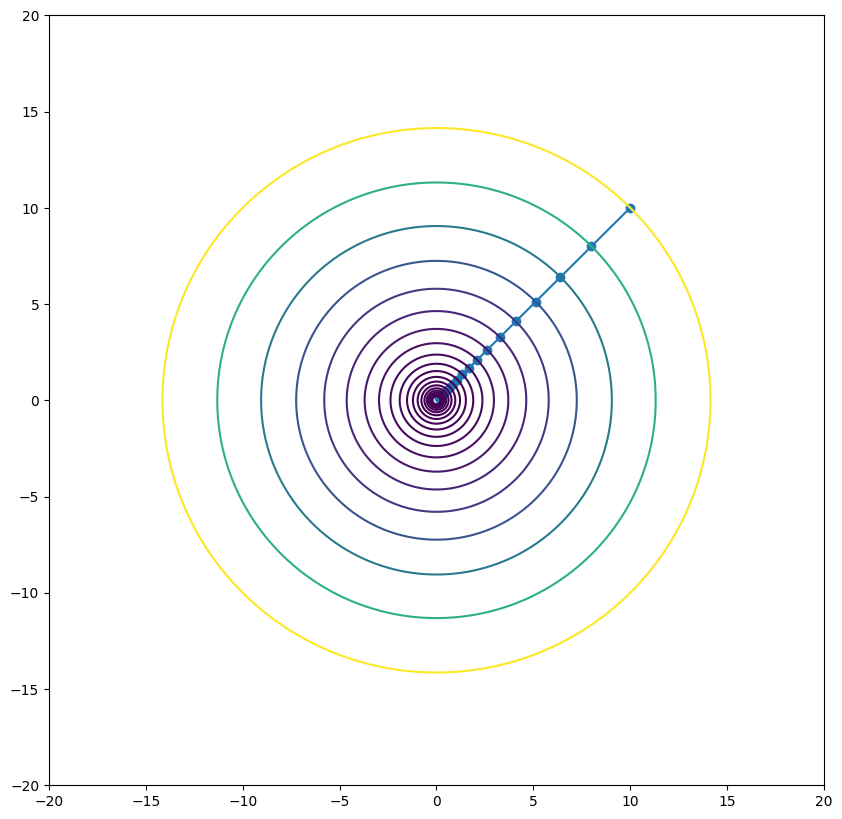

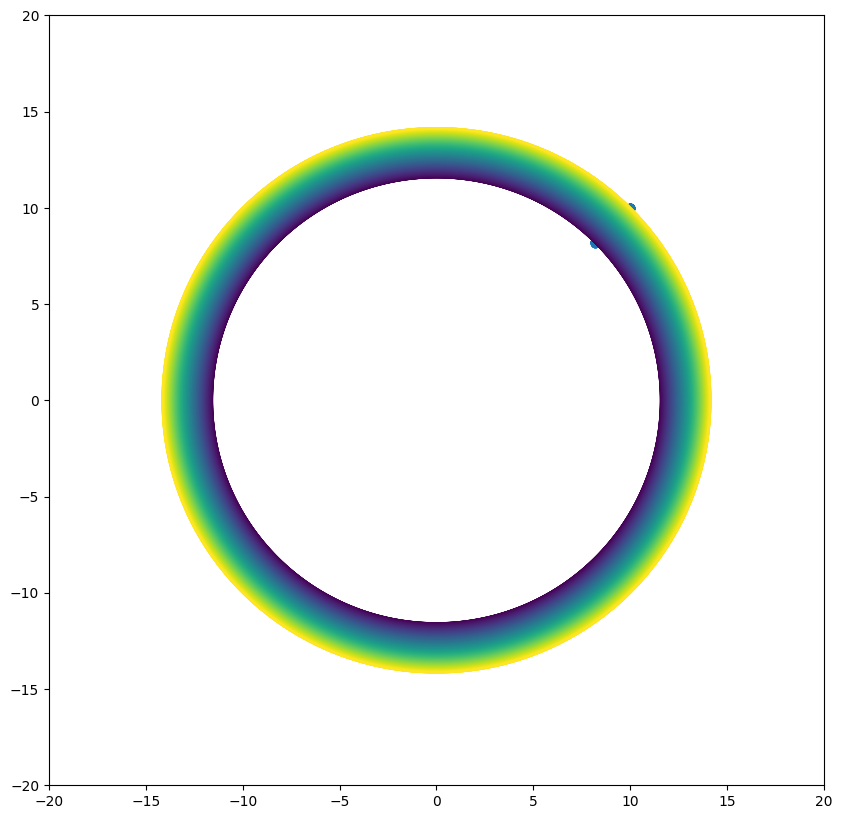

ValueError: Contour levels must be increasing

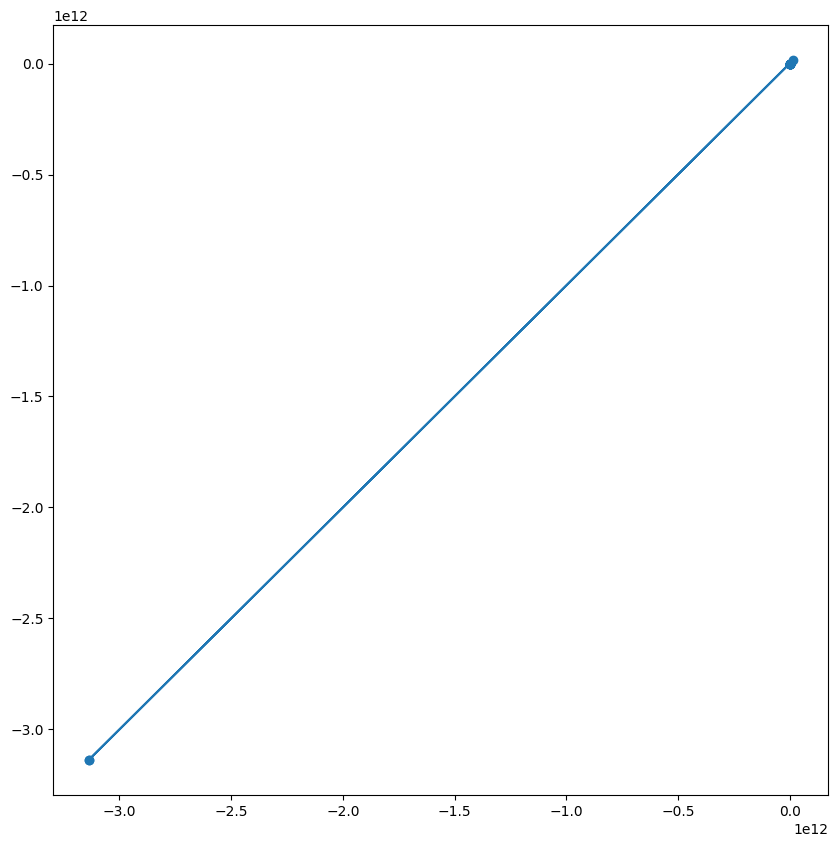

In [1116]:
start = [10, 10]
draw(norm_f, GD(norm_f, 0.1, start, epoch=20), np.linspace(-20, 20, 1000))
draw(small_norm_f, GD(small_norm_f, 0.1, start, epoch=1000), np.linspace(-20, 20, 1000))
draw(big_norm_f, GD(big_norm_f, 0.1, start, epoch=20), np.linspace(-20, 20, 1000))

Как видно из графиков, хорошо сошлась только нормализированная функция, в то время как функции со слишком маленьким числом обусловленности сходится очень долго, а фукция с завышенным числом обусловленности вообще расходится.

# Задание 5

### Генератор случайных квадратичных функций n переменных с числом обусловленности k

$f(x)=x^TAx$ где A – симметричная матрица.
Так как нас интересуют функции, у которых есть минимум, будем рассматривать только положительно определенные функции.
Перейдем у нашей функции к каноническому базису через домножение на ортогональную матрицу: $A=QDQ^T$,
$D$ – диагональная матрица с положительными коэффициентами. $D=diag(\lambda_1,...,\lambda_n)$
Наложим дополнительное условие на матрицу $D - \frac{λ_{max}}{λ_{min}}=k$. Тогда число обусловленности нашей функции
будет равно $k$.

В конечном счете получаем такой алгоритм генерации искомой функции:

1. Строим диагональную матрицу с положительными коэффициентами, такую что отношение максимального и минимального
   элементов на диагонали равно $k$.
2. Домножаем на любую ортогональную матрицу $A=QDQ^T$

In [1122]:
def random_f(n, k):
    first = random.random()
    second = k * first
    if first > second:
        first, second = second, first
    l = [first, second]
    for i in range(2, n):
        l.append(random.random() * (second - first) + first)
    random.shuffle(l)
    m = np.array(l)
    matr = np.zeros((n, n))
    for i in range(n):
        matr[i][i] = m[i]

    a = np.random.randn(n, n)
    q, r = np.linalg.qr(a)
    matr = q @ matr @ q.T

    def f(x: np.ndarray):
        return x.T @ matr @ x
    return f

# Задание 6

In [1127]:
# const k, diff n
k = 3
n = 2
iter_width_const_k = list()
while n < 200:
    sum_iter = 0
    for i in range(20):
        func = random_f(n, k)
        GD(func, 0.1, np.full(n, 10), epoch=200)
        sum_iter += count_grad_use
    iter_width_const_k.append(sum_iter / 20)
    n += 15

# const n, diff k
k = 1
n = 2
iter_width_const_n = list()
while k < 200:
    sum_iter = 0
    for i in range(20):
        func = random_f(n, k)
        GD(func, 0.1, np.full(n, 10), epoch=200)
        sum_iter += count_grad_use
    iter_width_const_n.append(sum_iter / 20)
    k += 15



C:\Users\Кирилл\PycharmProjects\pythonProject1\venv\Lib\site-packages\numpy\linalg\linalg.py:2590: RuntimeWarning: overflow encountered in power
  absx **= ord
C:\Users\Кирилл\PycharmProjects\pythonProject1\venv\Lib\site-packages\numpy\linalg\linalg.py:2591: RuntimeWarning: overflow encountered in reduce
  ret = add.reduce(absx, axis=axis, keepdims=keepdims)


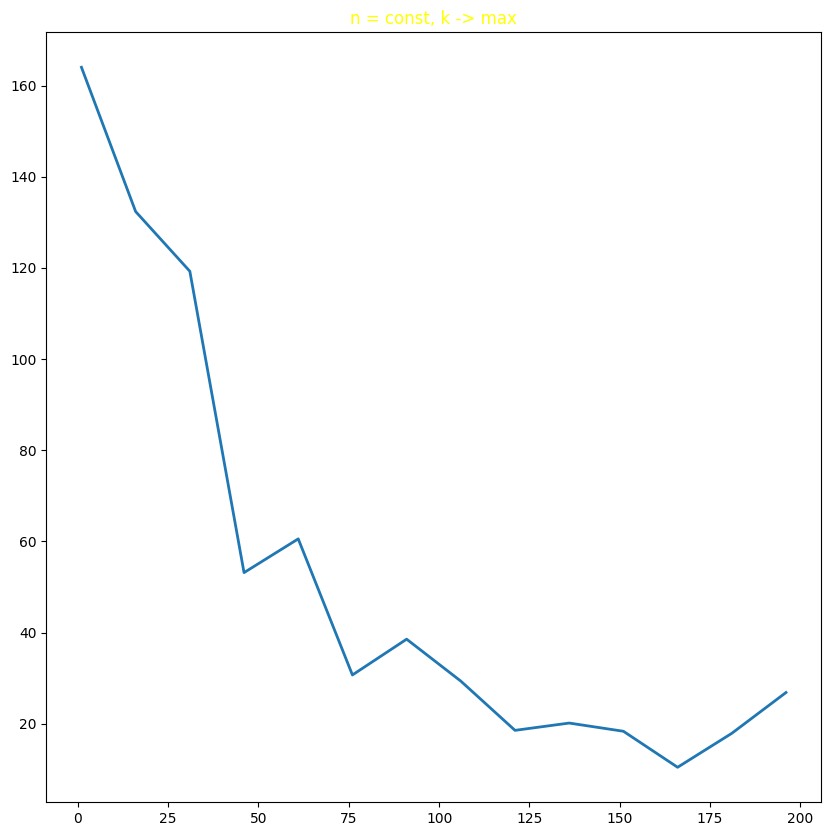

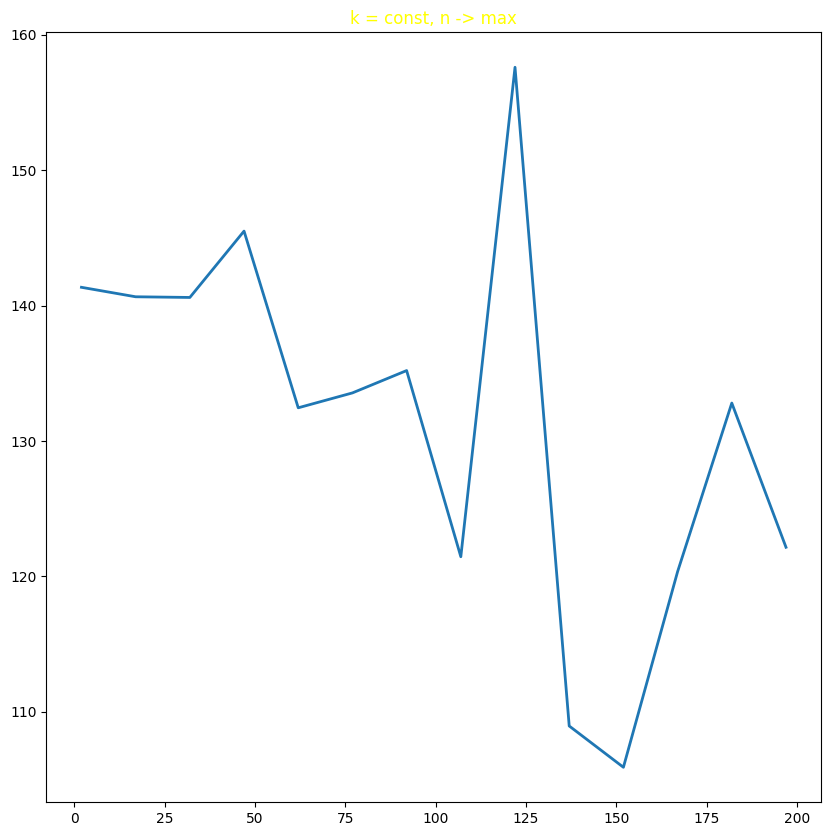

In [1128]:
fig, plt1 = plt.subplots(1, 1)
plt1.plot(np.array(range(1, 200, 15)), iter_width_const_n, linewidth=2.0)
plt1.set_title('n = const, k -> max', color='yellow')
plt.show()
fig, plt2 = plt.subplots(1, 1)
plt2.set_title('k = const, n -> max', color='yellow')
plt2.plot(np.array(range(2, 200, 15)), iter_width_const_k, linewidth=2.0)
plt.show()

Исходя из этих исследований можно сделать вывод, что размерность пространства не влияет на скорость сходимости алгоритма, в то время как зависимость числа итераций градиентного спуска от числа обусловленности довольно явно просматривается: чем больше число обусловленности, тем меньше нужно итераций алгоритма для сходимости.

# Дополнительное задание

In [1137]:
def wolfe_line_search(f, x, p_k, lr=1.0, c_1=1e-4, c_2=0.1, epoch=100, eps=1e-9, delta=1e-6):
    def first_condition(lr):
        return f(x + lr * p_k) < f(x) + c_1 * lr * np.dot(grad(f, x), p_k) + eps

    def second_condition(lr):
        return np.dot(grad(f, x + lr * p_k), p_k) + eps > c_2 * np.dot(grad(f, x), p_k)

    count = 0
    last_lr = 0
    curr_lr = lr
    l = 0.
    r = np.inf

    while count < epoch:
        if not first_condition(curr_lr):
            r = curr_lr
            curr_lr = (l + r) / 2
        elif not second_condition(curr_lr):
            l = curr_lr
            curr_lr = 2 * l if np.isinf(r) else (l + r) / 2
        else:
            return curr_lr
        if np.abs(curr_lr - last_lr) < delta:
            break
        last_lr = curr_lr
        count += 1
    return curr_lr


def wolfe_GD(f, x_start, delta=1e-4, epoch=1000):
    global count_grad_use
    count_grad_use = 0
    global count_func_use
    count_func_use = 0
    x_k = x_start
    points = [x_k]
    for i in range(epoch):
        p_k = np.array(grad(f, x_k))
        alpha = wolfe_line_search(f, x_k, -p_k)
        x_k_1 = x_k - alpha * p_k
        points.append(x_k_1)
        if np.linalg.norm(p_k) < delta:
            break
        x_k = x_k_1

    return np.array(points)

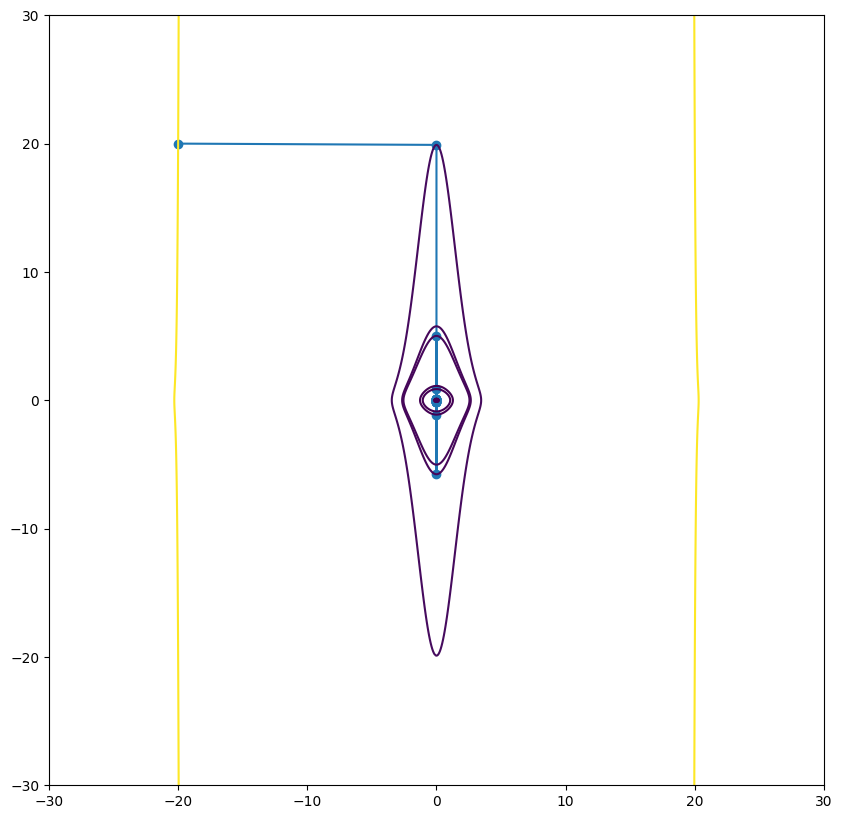

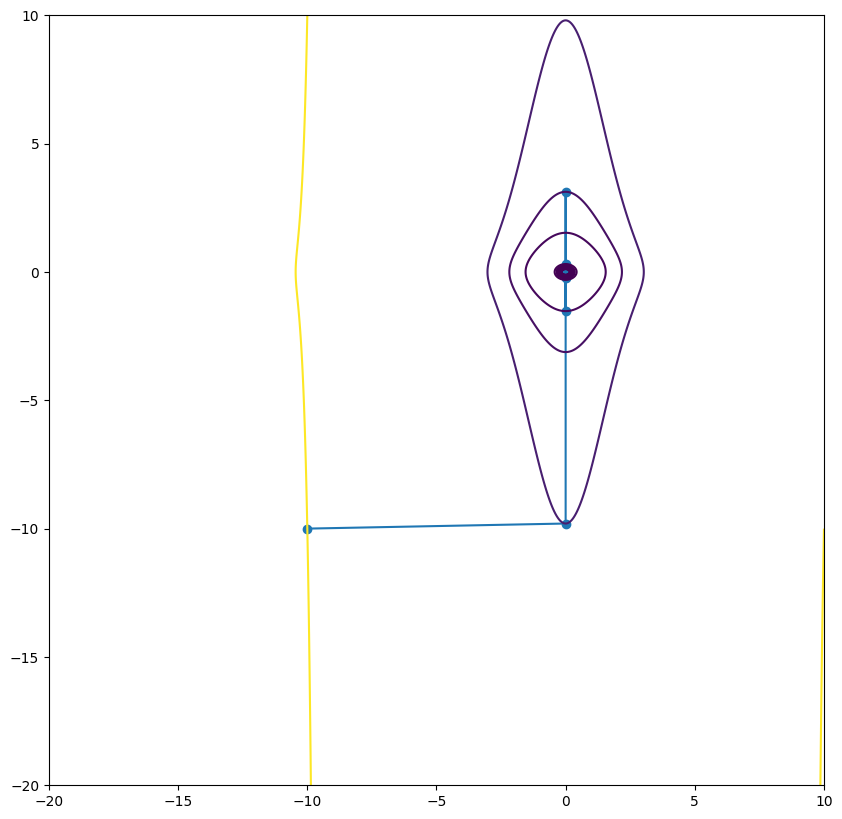

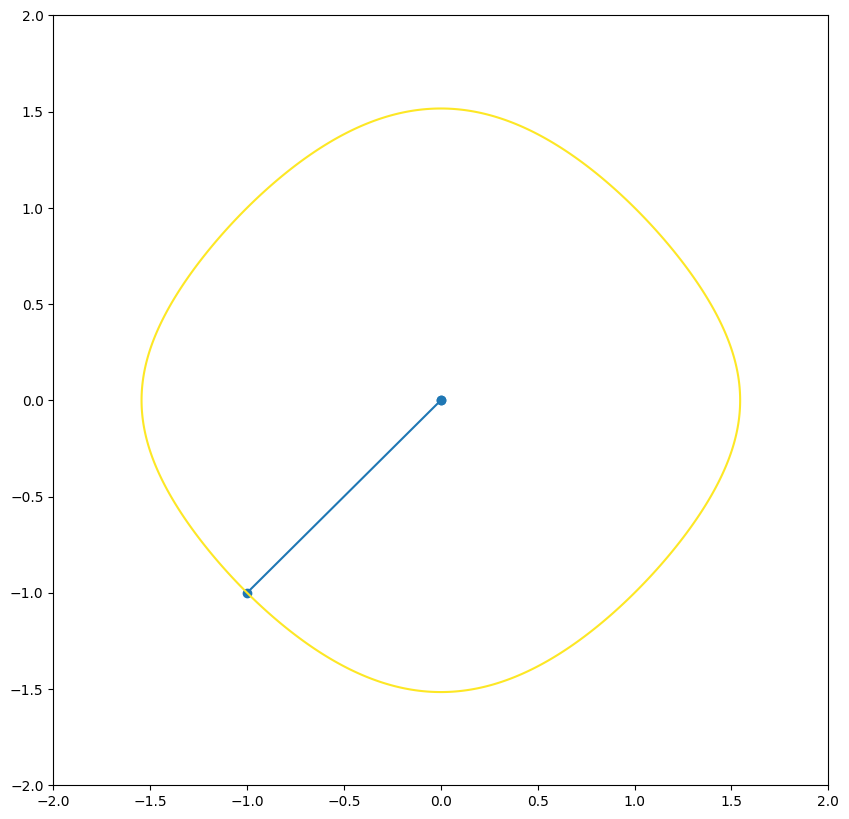

  Start point  Number of grad calls  Number of f calls                       Result                      Expected
0   [-20, 20]           134                 536            [4.163336342344337e-16, -0.08897844608857616]  [0, 0] 
1  [-10, -10]           110                 440            [2.0816681711721685e-16, 0.11260368488879965]  [0, 0] 
2    [-1, -1]             8                  32         [-9.727644003623605e-22, 1.6663345925029385e-09]  [0, 0] 


In [1138]:
grads_calls = list()
func_calls = list()
points = list()
for i in range(3):
    point = wolfe_GD(f2, start_points_f2[i], epoch=20)
    draw(f2, point, np.linspace(t[i][0], t[i][1], 1000))
    grads_calls.append(count_grad_use)
    func_calls.append(count_func_use)
    points.append(point[-1])

tabl(start_points_f2, grads_calls, func_calls, points, point_result_f2)

Если сравнивать результат работы этого метода на функции 2 и обычного градиентного спуска, то можно заключить, что метод Вльфе затрачивает большее количество вычислений функции и градиента, но при этом хорошо сходится, в то время как градиентный спуск тратит меньше ресурсов, но при этом совсем не сходится из точек, не лежащих в окрестности минимума.